In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv('pokemon.csv')
data_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
# Checking frequency of pokemon types
print(data_df['Type 1'].value_counts(dropna=False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [4]:
data_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


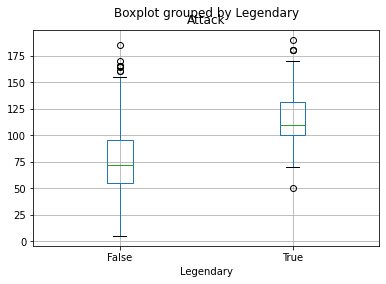

In [5]:
# Visual exploratory data analysis

# Box plot: visualize basic statistics, like outliers, min/max or quantiles

# Compare attack of pokemons that are legendary or not

data_df.boxplot(column='Attack', by='Legendary')

In [6]:
# Tidy data

# Explaining melt with first 5 rows in a new dataframe
data_new = data_df.head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
# id_vars - what we do not want to melt
# value_vars - what we want to melt

melted = pd.melt(frame=data_new, id_vars='Name', value_vars=['Attack', 'Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [9]:
# Pivoting data
# reverse of melting

melted.pivot(index='Name', columns='variable', values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [10]:
# Concatenating data
data1 = data_df.head()
data2 = data_df.tail()

conc_data_row = pd.concat([data1, data2], axis=0, ignore_index=True)
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [11]:
data1 = data_df['Attack'].head()
data2 = data_df['Defense'].head()
conc_data_col = pd.concat([data1, data2], axis=1)
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [12]:
# Converting data types

data_df.dtypes


#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [13]:
data_df['Type 1'] = data_df['Type 1'].astype('category')
data_df['Speed'] = data_df['Speed'].astype('float')

In [15]:
data_df.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

In [16]:
# Missing data and testing with assert

# We can: leave as it is, drop them with dropna(), fill missing values with fillna(), fill missing values with mean values

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 65.0+ KB


In [18]:
data_df['Type 2'].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Ghost        14
Rock         14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [20]:
# Dropping NaN values
data1 = data_df
data1['Type 2'].dropna(inplace=True)

In [23]:
# Checking with assert statement
assert data_df['Type 2'].notnull().all() # returns nothing because we dropped NaN values

In [24]:
data_df['Type 2'].fillna('empty', inplace=True)

In [25]:
assert data_df['Type 2'].notnull().all() # returns nothing

In [26]:
# Pandas

# Building dataframes from scratch
country = ['Spain', 'France']
population = ['11', '12']
list_label = ['country', 'population']
list_col = [country, population]
zipped = list(zip(list_label, list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [27]:
# Adding new columns
df['capital'] = ['madrid', 'paris']
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [28]:
# Broadcasting entire column
df['income'] = 0
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


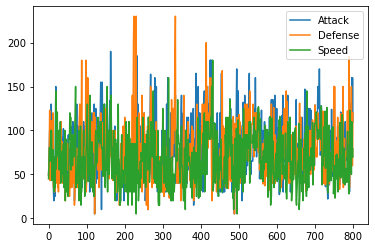

In [29]:
# Visual exploratory data analysis

# plotting all data
data1 = data_df.loc[:, ['Attack', 'Defense', 'Speed']]
data1.plot()

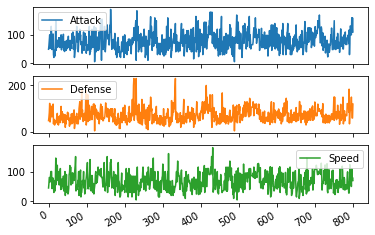

In [31]:
data1.plot(subplots=True)
plt.show()

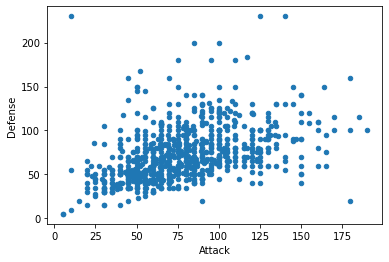

In [32]:
# Scatter plot
data1.plot(kind='scatter', x='Attack', y='Defense')
plt.show()

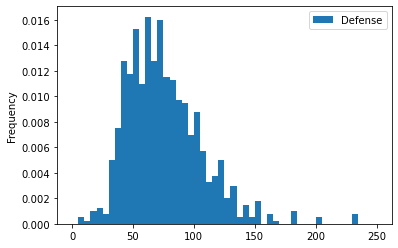

In [40]:
# Hist plot
data1.plot(kind='hist', y='Defense', bins=50, range=(0, 250), density=True)
plt.show()

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

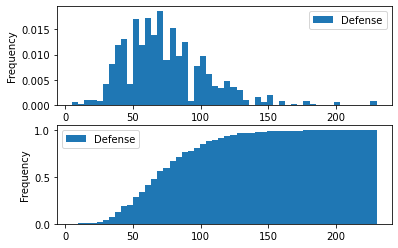

In [45]:
# Histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2, ncols=1)
data1.plot(kind='hist', y='Defense', bins=50, density=True, ax=axes[0])
data1.plot(kind='hist', y='Defense', bins=50, density=True, ax=axes[1], cumulative=True)
plt.savefig('graph.png')
plt


In [46]:
# Statistical exploratory data analysis
data_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [47]:
# Indexing pandas time series
time_list = ['1992-03-08', '1992-04-12']
print(type(time_list[1])) # date is string

<class 'str'>


In [49]:
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [50]:
# Close warning
import warnings
warnings.filterwarnings('ignore')

# Take a head of pokemon data and add it a time list
data2 = data_df.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2['date'] = datetime_object

# Making date as index
data2 = data2.set_index('date')
data2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


In [51]:
# Select according to date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100   80.0           1      False  
1993-03-15      120   80.0           1      False  
1993-03-16       50   65.0           1      False  


In [53]:
# Resampling pandas time series
# Statistical method over different time intervals
# Downsampling, upsampling, interpolate


data2.resample('A').mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [54]:
data2.resample('M').mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Interpolate with mean value
data2.resample("M").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


In [62]:
# Slicing data frame
print(type(data_df['HP']))
print(type(data_df[['HP']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [63]:
# Slicing and indexing data frame
data_df.loc[1:10, 'HP': 'Defense'] # 10 and Defense are inclusive

,HP,Attack,Defense
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43
5,58,64,58
6,78,84,78
7,78,130,111
8,78,104,78
9,44,48,65
10,59,63,80


In [68]:
# Reverse slicing
data_df.loc[10:1:-1, "HP": 'Defense']

,HP,Attack,Defense
10,59,63,80
9,44,48,65
8,78,104,78
7,78,130,111
6,78,84,78
5,58,64,58
4,39,52,43
3,80,100,123
2,80,82,83
1,60,62,63


In [69]:
# Slicing from something to end
data_df.loc[1:10, 'Speed':]

,Speed,Generation,Legendary
1,60.0,1,False
2,80.0,1,False
3,80.0,1,False
4,65.0,1,False
5,80.0,1,False
6,100.0,1,False
7,100.0,1,False
8,100.0,1,False
9,43.0,1,False
10,58.0,1,False


In [70]:
# Filtering data frames
boolean = data_df.HP > 200
data_df[boolean]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,122,Chansey,Normal,NaN,250,5,5,35,105,50.0,1,False
261,262,Blissey,Normal,NaN,255,10,10,75,135,55.0,2,False


In [71]:
# Combining filters
first_filter = data_df.HP > 150
second_filter = data_df.Speed > 35
data_df[first_filter & second_filter]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,122,Chansey,Normal,NaN,250,5,5,35,105,50.0,1,False
261,262,Blissey,Normal,NaN,255,10,10,75,135,55.0,2,False
351,352,Wailord,Water,NaN,170,90,45,90,45,60.0,3,False
655,656,Alomomola,Water,NaN,165,75,80,40,45,65.0,5,False


In [72]:
# Filtering column based others
data_df.HP[data_df.Speed < 15]

230     20
359     45
486     50
495    135
658     44
Name: HP, dtype: int64

In [73]:
# Transforming data

# Plain python functions
def div(n):
  return n / 2

data_df.HP.apply(div)

0      22.5
1      30.0
2      40.0
3      40.0
4      19.5
       ... 
795    25.0
796    25.0
797    40.0
798    40.0
799    40.0
Name: HP, Length: 800, dtype: float64

In [74]:
# Using lambda function
data_df.HP.apply(lambda n: n / 2)

0      22.5
1      30.0
2      40.0
3      40.0
4      19.5
       ... 
795    25.0
796    25.0
797    40.0
798    40.0
799    40.0
Name: HP, Length: 800, dtype: float64

In [75]:
# Defining column using other columns

data_df['Total power'] = data_df.Attack + data_df.Defense
data_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total power
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,223
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,95


In [76]:
# Index objects and labeled data
print(data_df.index.name)

# Changing index name
data_df.index.name = 'index_name'
data_df.head()

None


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total power
index_name,,,,,,,,,,,,,
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,223
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,95


In [77]:
# Overwrite index
# If we want to change index we need to change all of them

data3 = data_df.copy()

# Making index start from 100
data3.index = range(100, 900, 1)
data3.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total power
100,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False,98
101,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False,125
102,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False,165
103,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False,223
104,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False,95


In [78]:
# Setting index: type 1 is outer, type 2 is inner index
data1 = data_df.set_index(['Type 1', 'Type 2'])
data1.head(20)

#              Name  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                                
Grass  Poison   1         Bulbasaur  45      49       49       65       65   
       Poison   2           Ivysaur  60      62       63       80       80   
       Poison   3          Venusaur  80      82       83      100      100   
       Poison   4     Mega Venusaur  80     100      123      122      120   
Fire   NaN      5        Charmander  39      52       43       60       50   
       NaN      6        Charmeleon  58      64       58       80       65   
       Flying   7         Charizard  78      84       78      109       85   
       Dragon   8  Mega Charizard X  78     130      111      130       85   
       Flying   9  Mega Charizard Y  78     104       78      159      115   
Water  NaN     10          Squirtle  44      48       65       50       64   
       NaN     11         Wartortle  59      63       80       65       80   
       NaN     12         Blastoise  79      83      100       85      105   
       NaN     13    Mega Blastoise  79     103      120      135      115   
Bug    NaN     14          Caterpie  45      30       35       20       20   
       NaN     15           Metapod  50      20       55       25       25   
       Flying  16        Butterfree  60      45       50       90       80   
       Poison  17            Weedle  40      35       30       20       20   
       Poison  18            Kakuna  45      25       50       25       25   
       Poison  19          Beedrill  65      90       40       45       80   
       Poison  20     Mega Beedrill  65     150       40       15       80   

               Speed  Generation  Legendary  Total power  
Type 1 Type 2                                             
Grass  Poison   45.0           1      False           98  
       Poison   60.0           1      False          125  
       Poison   80.0           1      False          165  
       Poison   80.0           1      False          223  
Fire   NaN      65.0           1      False           95  
       NaN      80.0           1      False          122  
       Flying  100.0           1      False          162  
       Dragon  100.0           1      False          241  
       Flying  100.0           1      False          182  
Water  NaN      43.0           1      False          113  
       NaN      58.0           1      False          143  
       NaN      78.0           1      False          183  
       NaN      78.0           1      False          223  
Bug    NaN      45.0           1      False           65  
       NaN      30.0           1      False           75  
       Flying   70.0           1      False           95  
       Poison   50.0           1      False           65  
       Poison   35.0           1      False           75  
       Poison   75.0           1      False          130  
       Poison  145.0           1      False          190

In [83]:
# Pivoting data frames
dic = {'treatment': ['A', 'A', 'B', 'B'], 'gender': ['F', 'M', 'F', 'M'], 'response': [10, 45, 5, 9], 'age': [15, 4, 72, 65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [84]:
# Pivoting
df.pivot(index='treatment', columns='gender', values='response')

gender,F,M
treatment,,
A,10,45
B,5,9


In [85]:
# Stacking and unstacking dataframe
df1 = df.set_index(['treatment', 'gender'])
df1

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [86]:
df1.unstack(level=0)

response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [87]:
df1.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [88]:
# Change inner and outer index position
df2 = df1.swaplevel(0, 1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


In [89]:
# Categoricals and groupby
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [90]:
df.groupby('treatment').mean()

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [92]:
df.groupby('treatment').age.max()

treatment
A    15
B    72
Name: age, dtype: int64

In [93]:
df.groupby("treatment")[["age","response"]].min() 

,age,response
treatment,,
A,4,10
B,65,5
